In [1]:
import plotly.graph_objects as go
import urllib, json
import pandas as pd
import io

In [2]:
with open('sankey_configuration.json') as json_file:
    configuration = json.load(json_file)

In [3]:
index_map = {}
node = {
    "pad": 15,
    "line": {
        "color": "black",
        "width": 0.5
    },
    "label": [],
    "color": []
}

link = {
    "source": [],
    "target": [],
    "value": [],
    "color": [],
    "label": []
}

for num, n in enumerate(configuration['nodes']):
    node['label'].append(n['label'])
    node['color'].append(n['color'])
    index_map[n['source']] = num

for ln in configuration['link']:
    if ln['source'] is not '' and ln['target'] is not '' and ln['value'] is not '' and ln['color'] is not '':
        link['source'].append(index_map[ln['source']])
        link['target'].append(index_map[ln['target']])
        link['value'].append(ln['value'])
        link['color'].append(ln['color'])
        link['label'].append(ln['label'] if 'label' in ln else '')
    
data = {
    "data": [{
        "type": "sankey",
        "domain": {
            "x": [0, 1],
            "y": [0, 1]
        },
        "orientation": "h",
        "valueformat": ".0f",
        "valuesuffix": "TWh",
        "node": node,
        "link": link
    }]
}
'done'

'done'

In [4]:
fig = go.Figure(data=[go.Sankey(
    valueformat = "",
    valuesuffix = "",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

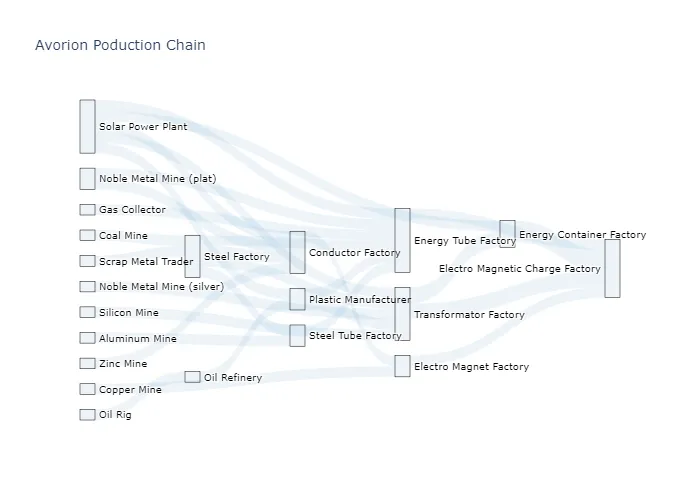

In [13]:
from IPython.display import Image
fig.update_layout(title_text="Factory Chain: Electro Magnetic Charge Factory", font_size=10)
Image(fig.to_image(format='webp'))

In [15]:
import plotly 
plotly.__version__

'4.6.0'